# 🧩 Mini-Lab: Environment Setup with uv & Cursor

**Module 1: Setup & Working Style for LLM Apps** | **Duration: ~20 min** | **Type: Mini-Lab**

---

## Learning Objectives

By the end of this mini-lab, you will be able to:

1. **Set up** Cursor IDE and clone the course repository
2. **Install** uv package manager for fast dependency management
3. **Manage** API keys securely with environment variables
4. **Test** your setup with a simple API call

## Target Concepts

| Concept | Description |
|---------|-------------|
| API Keys & Environment Variables | Secure storage and loading of secrets |
| Secrets Hygiene | Never log or expose API keys |

## 1. Install an IDE

We'll use [Cursor](https://cursor.com) in this course — an AI-powered IDE built on VS Code. If you prefer **VS Code** or another IDE, that works too (the experience will be similar).

### Installation

1. Download from [cursor.com](https://cursor.com/download)
2. Install for your platform (Mac/Windows/Linux)

### Recommended Extensions

- **Python** - Microsoft's Python extension
- **Jupyter** - For notebook support

### Configure Python Interpreter (After venv setup)

1. Press `Ctrl+Shift+P` (Windows) or `Cmd+Shift+P` (Mac)
2. Type "Python: Select Interpreter"
3. Choose the interpreter from your virtual environment:
   - Mac/Linux: `.venv/bin/python`
   - Windows: `.venv\Scripts\python.exe`

## 2.1 Install Git (Quick Guide)

Git is required to clone the course repository.

| Platform | Command / Action |
|----------|------------------|
| **macOS** | Run `git --version` — macOS will prompt to install if needed |
| **Windows** | Download from [git-scm.com](https://git-scm.com/download/win) |
| **Linux** | `sudo apt install git` (Debian/Ubuntu) or `sudo dnf install git` (Fedora) |


## 2.2 Install Git (Detailed Guide)
### macOS

#### Option A — Xcode Command Line Tools (fastest, zero setup)

```bash
git --version
```

If Git is not installed, macOS will automatically prompt:

> "The git command requires the command line developer tools."

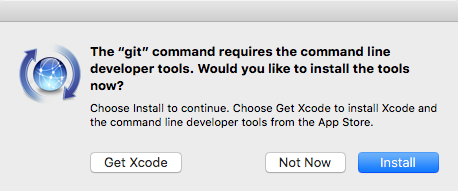

Click **Install** to begin the installation:

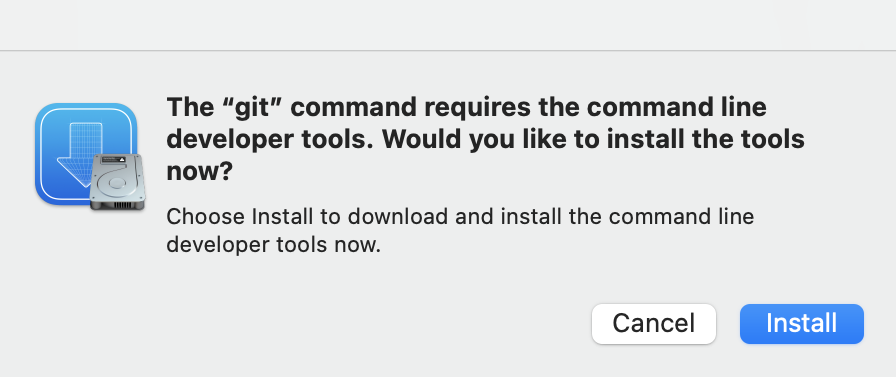

Accept it → Git gets installed.

#### Option B — Homebrew (preferred for developers)

Install Homebrew (one-liner):

```bash
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
```

Install Git:

```bash
brew install git
```

### Windows (Git Bash)

> **Note:** Windows cannot install Git via pure bash alone unless a package manager is already installed. The standard approach is **Git for Windows**, which gives you Git Bash.

#### Step 1 — Install Git for Windows (one-time)

1. Download and install [Git for Windows](https://git-scm.com/download/win)
2. During install, select:
   - ✅ "Git Bash Here"
   - ✅ "Use Git from the command line and third-party software"

#### Step 2 — Open Git Bash and verify

```bash
git --version
```

From this point on, all bash commands are identical to macOS/Linux.


### Verify Installation (same for everyone)

```bash
git --version
which git

> 📖 For detailed instructions, see the [Git Installation Guide](guide/git-installation-guide.md)

## 3. Clone the Course Repository

```bash
# Clone the repository
git clone <course-repo-url>
cd <course-repo>
```

The cloned repository includes:
- `pyproject.toml` — Project configuration and dependencies
- `uv.lock` — Locked dependency versions for reproducibility
- `requirements.txt` — Fallback for pip users

## 4. Install uv Package Manager

[uv](https://github.com/astral-sh/uv) is a fast Python package manager written in Rust — 10-100x faster than pip!

### Option 1 — Official Installer (Recommended, Cross-Platform)

Use this command in a bash-style terminal:
- **macOS / Linux:** Terminal
- **Windows:** Git Bash

```bash
curl -LsSf https://astral.sh/uv/install.sh | sh
```

> **Windows users:** After installation, restart Git Bash so the PATH updates are picked up.

### Option 2 — pip (if Python is already installed)

```bash
pip install uv
```

### Verify Installation

```bash
uv --version
```

> 📖 For detailed instructions, see the [uv Installation Guide](guide/uv-installation-guide.md)

## Two Ways to Use uv

uv supports two workflows. Understanding both helps you choose the right one:

### Comparison

| Feature | pip-style | project-style |
|---------|-----------|---------------|
| **Command** | `uv pip install -r requirements.txt` | `uv add` + `uv sync` |
| **Config file** | `requirements.txt` | `pyproject.toml` |
| **Lockfile** | None | `uv.lock` (auto-generated) |
| **Reproducibility** | Manual version pinning | Automatic |
| **Best for** | Learning, quick scripts | Production, deployment |

### pip-style (What We'll Use for Learning)

```bash
uv venv                              # Create venv
uv pip install -r requirements.txt   # Install deps
uv pip install openai                # Add one package
```

**Pros:** Simple, familiar, no extra files  
**Cons:** No lockfile = versions may drift between machines

### project-style (For Deployment Later)

```bash
uv init                    # Creates pyproject.toml
uv add openai anthropic    # Adds deps + creates uv.lock
uv sync                    # Installs exact versions from lockfile
pyproject.toml  →  Defines what packages you need
uv.lock         →  Locks exact versions (auto-generated)
.venv/          →  Your virtual environment
```

**Pros:** Exact reproducibility, great for teams/deployment  
**Cons:** More files to manage

For this course we use uv's **project-style** workflow with lockfiles because:

| Benefit | Description |
|---------|-------------|
| **Reproducibility** | Everyone gets the exact same dependency versions |
| **Consistency** | Your code works the same as the instructor's |
| **Deployment Ready** | Same workflow for development and production |
| **Fast** | uv is 10-100x faster than pip |

When you run `uv sync`, it reads `uv.lock` and installs the **exact same versions** every time.

## Common uv Commands

| Command | Description |
|---------|-------------|
| `uv init` | Initialize a new project |
| `uv add <package>` | Add a dependency |
| `uv add <package> --dev` | Add a dev dependency |
| `uv sync` | Install dependencies from lockfile |
| `uv run python script.py` | Run a script in the venv |
| `uv run jupyter notebook` | Run Jupyter in the venv |

### Adding Individual Packages

```bash
# Add a single package
uv add openai

# Add multiple packages
uv add openai python-dotenv anthropic

# Add with version constraint
uv add "openai>=1.0.0"

# Add dev dependency (testing, linting)
uv add pytest --dev
```

## 5. Install Dependencies

Since the cloned repository already has `pyproject.toml` and `uv.lock`, simply run:

```bash
uv sync
```

That's it! This command:
- Creates a `.venv` virtual environment
- Installs **exact** dependency versions from `uv.lock`
- Ensures your environment matches the instructor's

> **Note:** Remember to configure your Python interpreter in Cursor/VS Code to use `.venv/bin/python` (Mac/Linux) or `.venv\Scripts\python.exe` (Windows) — see Section 1.

## 6. Why Environment Variables?

**Never hardcode API keys in your code!**

```python
# ❌ BAD - Never do this
client = OpenAI(api_key="sk-abc123...")

# ✅ GOOD - Use environment variables
client = OpenAI()  # Automatically reads OPENAI_API_KEY
```

### Why?

1. **Security**: Keys in code can be accidentally committed to git
2. **Flexibility**: Different keys for dev/staging/production
3. **Sharing**: Code can be shared without exposing credentials
4. **Rotation**: Easy to rotate keys without code changes

## 7. Create Your `.env` File

Create a `.env` file in your project root:

```bash
# .env file - NEVER commit this to git!

# OpenAI API Key (required)
OPENAI_API_KEY=sk-your-key-here

# Anthropic API Key (optional)
ANTHROPIC_API_KEY=sk-ant-your-key-here
```

### Add `.env` to `.gitignore`

```bash
# .gitignore
.env
.env.local
.env.*.local
```

**In Cursor:** Right-click in Explorer → New File → `.env`

## 8. Load and Verify Environment

In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

def mask_key(key: str | None) -> str:
    """Safely mask an API key for display."""
    if not key:
        return "NOT SET"
    if len(key) < 12:
        return "****"
    return key[:8] + "..." + key[-4:]

def check_env_setup():
    """Verify environment variables are configured."""
    
    print("🔍 Checking Environment Setup")
    print("=" * 50)
    
    # Check required variables
    openai_key = os.getenv("OPENAI_API_KEY")
    anthropic_key = os.getenv("ANTHROPIC_API_KEY")
    
    print(f"\n📋 API Keys:")
    print(f"  OpenAI:    {mask_key(openai_key)}")
    print(f"  Anthropic: {mask_key(anthropic_key)}")
    
    if openai_key:
        print("\n✅ OpenAI key configured - ready to proceed!")
        return True
    else:
        print("\n❌ Please set OPENAI_API_KEY in your .env file")
        return False

check_env_setup()

## 9. Secrets Hygiene

### ❌ Things to NEVER Do

```python
# Never print API keys
print(f"Using key: {os.getenv('OPENAI_API_KEY')}")

# Never log API keys
logger.info(f"API key: {api_key}")

# Never include in error messages
raise Exception(f"Failed with key {api_key}")
```

### ✅ Safe Practices

```python
# Log that you're using a key, not the key itself
print("Using OpenAI API key from environment")

# Mask keys if display is needed
print(f"Key: {mask_key(key)}")

# Let clients read from environment automatically
client = OpenAI()  # Reads OPENAI_API_KEY automatically
```

## 10. Initialize and Test OpenAI Client

In [ ]:
from openai import OpenAI

# Initialize client - automatically reads OPENAI_API_KEY
client = OpenAI()
print("✅ OpenAI client initialized")

In [ ]:
def test_openai_connection():
    """Test the OpenAI API connection."""
    
    print("\n🧪 Testing OpenAI API Connection")
    print("=" * 50)
    
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": "Say 'Hello, AI Engineer!' in exactly those words."}],
            max_tokens=20,
            temperature=0
        )
        
        print(f"✅ Connection successful!")
        print(f"📤 Response: {response.choices[0].message.content}")
        print(f"📊 Tokens used: {response.usage.total_tokens}")
        return True
        
    except Exception as e:
        print(f"❌ Connection failed: {type(e).__name__}")
        print(f"   Error: {str(e)[:100]}...")
        return False

test_openai_connection()

## 🎯 Summary

### Key Takeaways

1. **IDE Setup**
   - Cursor (or VS Code) for AI-powered development
   - Configure Python interpreter to use `.venv`

2. **Git & Clone**
   - Install Git for your platform
   - Clone the course repo to get all materials

3. **uv Package Manager**
   - 10-100x faster than pip
   - `uv sync` - install from lockfile (reproducible!)
   - `uv add <package>` - add new dependencies

4. **Environment Variables**
   - Store secrets in `.env` file
   - Add `.env` to `.gitignore`
   - Use `python-dotenv` to load variables

5. **Secrets Hygiene**
   - Never print, log, or hardcode API keys
   - Mask keys when display is needed

### Quick Reference

```bash
# Clone and setup
git clone <course-repo>
cd <course-repo>
uv sync

# Add more packages later
uv add <package>

# Run scripts
uv run python script.py
```

### Next Steps

- **mini-ollama-setup**: Set up local LLMs with Ollama
- **lab-hello-llm**: Build your first LLM-powered app